In [1]:
# Wrangling:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as ss

# Plots:
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from matplotlib.lines import Line2D
from pandas.plotting import parallel_coordinates as pcp
from matplotlib.patches import Patch

import warnings
warnings.filterwarnings("ignore")

***
## Part 1: Zooming in on the Top 200

**Task 1**

Create a set of scatterplots as a figure with 4 subplots in a 2x2 grid. Each scatterplot will have on x one of the following variables:

num_students (count of total number of students) <br>
student_staff_ratio  <br>
international_students (percent of international students)  <br>
female (percent of female students) <br>

Add a vertical line to represent the median of the x variable on each plot. Every scatterplot should have the total score (total_score) on y.

In [2]:
# Reading in college data:
college_df = pd.read_csv("college_data.csv")
college_df

,world_rank,university_name,country,continent,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,female
0,1,California Institute of Technology,United States of America,North_America,95.6,64.0,97.6,99.8,97.8,95.1,2243.0,6.9,27.0,33 : 67,33.0
1,2,University of Oxford,United Kingdom,Europe,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46 : 54,46.0
2,3,Stanford University,United States of America,North_America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42 : 58,42.0
3,4,University of Cambridge,United Kingdom,Europe,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46 : 54,46.0
4,5,Massachusetts Institute of Technology,United States of America,North_America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37 : 63,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,601-800,Yeungnam University,South Korea,Asia,18.6,24.3,10.9,26.5,35.4,19.5,21958.0,15.3,3.0,48 : 52,48.0
796,601-800,Yıldız Technical University,Turkey,Europe,14.5,14.9,7.6,19.3,44.0,14.6,31268.0,28.7,2.0,36 : 64,36.0
797,601-800,Yokohama City University,Japan,Asia,24.0,16.1,10.2,36.4,37.9,23.3,4122.0,3.7,3.0,NaN,NaN
798,601-800,Yokohama National University,Japan,Asia,20.1,23.3,16.0,13.5,40.4,17.6,10117.0,12.1,8.0,28 : 72,28.0


In [3]:
# Creating new dfs of top 200 colleges and top 10 colleges:
top200_df = college_df.iloc[0:200]
top10_df = college_df.iloc[0:10]

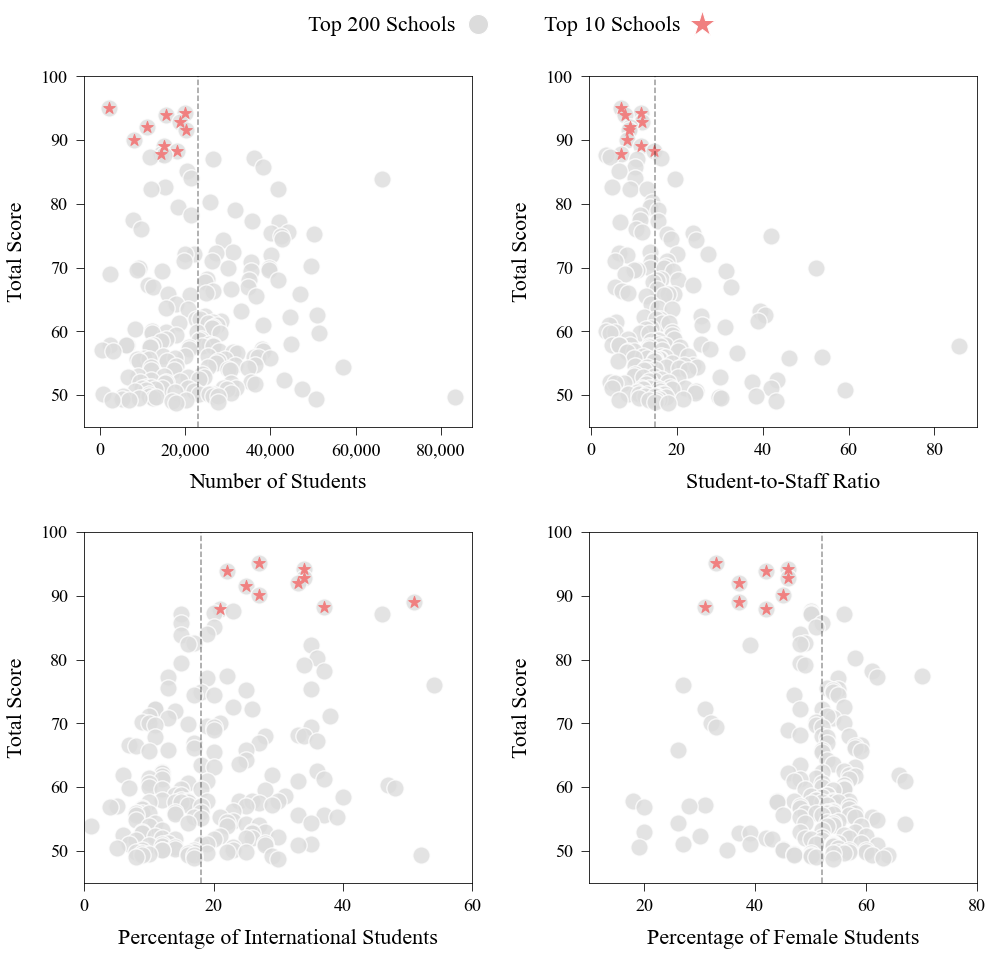

In [4]:
# Creating grid of subplots 2x2:
fig, ax = plt.subplots(2, 2, figsize = (16,14))
plt.subplots_adjust(top = 0.9,
                    bottom = 0.1,
                    wspace = 0.3, 
                    hspace = 0.3)
axes = ax.flatten() #1-D array to turn axes to matplotlib object

##################################################################
##################################################################
# Variable values and labels:
x_var = ['num_students', #count of total number of students
         'student_staff_ratio',
         'international_students', #percent of international students
         'female'] #percent of female students

y_var = 'total_score'

x_labels = ['Number of Students',
            'Student-to-Staff Ratio',
            'Percentage of International Students',
            'Percentage of Female Students']

y_label = 'Total Score'

# Constants and params:
LABEL_SIZE = 22
PAD = 14
TICK_SIZE = 18

# Font:
plt.rcParams['font.sans-serif'] = "Times New Roman" #changes the default 'sans-serif'
plt.rcParams['font.family'] = "sans-serif" #places new font TNR on figure and axes

##################################################################
##################################################################
# Creating scatterplot for each subplot:
for i, n, v in zip(range(len(axes)), #indices for each axes plot
                   x_labels, #labels for x-axis for each axes plot
                   x_var): #column names from df
    
    ax = sns.scatterplot(data = top200_df, x = top200_df[v], y = top200_df[y_var],
                    ax = axes[i], s = 300, alpha = 0.8, color = 'gainsboro')
    
    #marker for top 10 schools
    sns.scatterplot(data = top10_df, x = top10_df[x_var[i]], y = top10_df[y_var],
                    ax = ax, marker = '*', s = 150, alpha = 1, 
                    color = 'lightcoral', ec = 'lightcoral')

    #labels and tick marks
    axes[i].set_ylabel(y_label, fontsize = LABEL_SIZE, labelpad = PAD)
    axes[i].set_xlabel(n, fontsize = LABEL_SIZE, labelpad = PAD)
    axes[i].tick_params(labelsize = TICK_SIZE, pad = 8, length = 8)
    axes[i].set_ylim(45, 100) #y scale
    
    #fixing ticks on x-axis
    if i == 2:
        axes[i].set_xlim(0, 60)
        xticks = ticker.MaxNLocator(3) #controls how many ticks to include
        axes[i].xaxis.set_major_locator(xticks) 
        
    if i == 3:
        axes[i].set_xlim(10, 80)
        xticks = ticker.MaxNLocator(4)
        axes[i].xaxis.set_major_locator(xticks)
        
    #formatting x-axis values on num_students
    if i == 0:
        axes[i].set_xticklabels(labels = ['']+ ['0', '20,000', '40,000', '60,000','80,000'])
        
    #vertical median line for each variable
    axes[i].axvline(top200_df[v].median(), linestyle = '--', color = 'black', alpha = 0.4)

#legend
legend_elements = [Line2D([0], [0], marker = 'o', color = 'white',label = 'Top 200 Schools', markerfacecolor = 'gainsboro', markersize = 10),
                   Line2D([0], [0], marker = '*', color = 'white', label = 'Top 10 Schools', markerfacecolor = 'lightcoral', markersize = 14)]

plt.legend(handles = legend_elements, ncol = 2, markerfirst = False, frameon = False,
           fontsize = LABEL_SIZE, markerscale = 2, handletextpad = 0,
           bbox_to_anchor = [0.5, 0.95], bbox_transform = fig.transFigure, #making legend appear in the figure
           loc = 'center')

plt.savefig('scatter.png', bbox_inches = 'tight', facecolor = 'white')
plt.show()

**Task 2**

Calculate correlation coefficients for each of the x variables versus total score. How do the correlation coefficients compare to what you see in the scatterplots? Are there any cases where the correlation coefficient could be misleading? Why or why not?

In [5]:
top200_cor = top200_df.corr()
x_var = ['num_students','student_staff_ratio', 'international_students','female']

for a, b in zip(top200_cor.columns, top200_cor.index.values):
    if a != 'total_score':
        top200_cor.drop(columns = a, inplace = True)
    if b not in x_var:
        top200_cor.drop(index = b, inplace = True)
    
top200_cor

,total_score
num_students,0.076382
student_staff_ratio,-0.212123
international_students,0.271538
female,-0.126883


***
## Part 2: Comparing the highest ranked to the lowest ranked

**Task 1**

Create a parallel coordinates plot that compares the top 200 and last 200 based on the variables:

<div class=pull-left>
teaching
    &nbsp;&nbsp;&nbsp;
research
    &nbsp;&nbsp;&nbsp;
citations
    &nbsp;&nbsp;&nbsp;
international
    &nbsp;&nbsp;&nbsp;
</div>
<div class=pull-right>
income
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
female
    &nbsp;&nbsp;&nbsp;
</div>

In [6]:
# Create the last 200 (lowest ranked) schools and join this with the top 200:
last200_df = college_df.iloc[-200:]
first_last_df = pd.concat([top200_df, last200_df]).reset_index()

In [7]:
# Create a new column "Ranks" to see if the observation was in the top or last 200:
first_last_df['Ranks'] = ['top']*200 + ['last']*200
first_last_df

,index,world_rank,university_name,country,continent,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,female,Ranks
0,0,1,California Institute of Technology,United States of America,North_America,95.6,64.0,97.6,99.8,97.8,95.1,2243.0,6.9,27.0,33 : 67,33.0,top
1,1,2,University of Oxford,United Kingdom,Europe,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46 : 54,46.0,top
2,2,3,Stanford University,United States of America,North_America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42 : 58,42.0,top
3,3,4,University of Cambridge,United Kingdom,Europe,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46 : 54,46.0,top
4,4,5,Massachusetts Institute of Technology,United States of America,North_America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37 : 63,37.0,top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,795,601-800,Yeungnam University,South Korea,Asia,18.6,24.3,10.9,26.5,35.4,19.5,21958.0,15.3,3.0,48 : 52,48.0,last
396,796,601-800,Yıldız Technical University,Turkey,Europe,14.5,14.9,7.6,19.3,44.0,14.6,31268.0,28.7,2.0,36 : 64,36.0,last
397,797,601-800,Yokohama City University,Japan,Asia,24.0,16.1,10.2,36.4,37.9,23.3,4122.0,3.7,3.0,NaN,NaN,last
398,798,601-800,Yokohama National University,Japan,Asia,20.1,23.3,16.0,13.5,40.4,17.6,10117.0,12.1,8.0,28 : 72,28.0,last


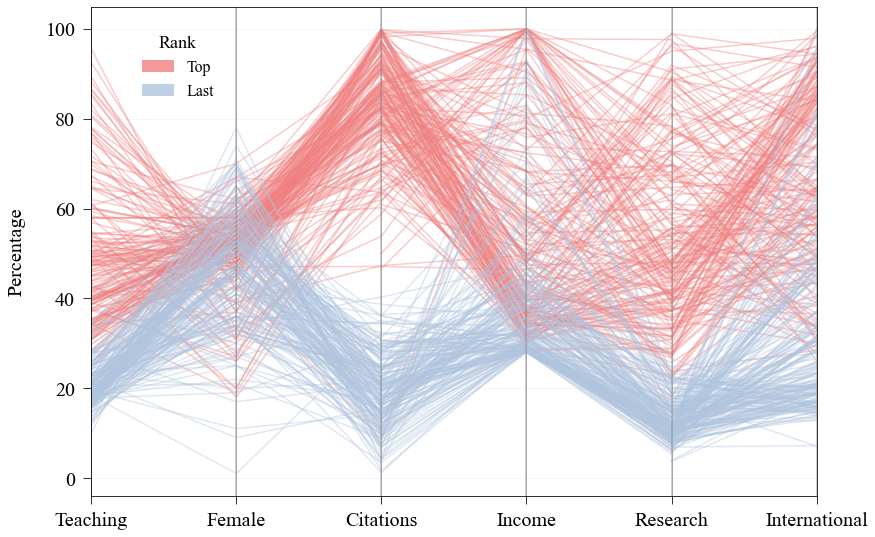

In [8]:
plt.figure(figsize = [13,9])
colors = ['lightcoral', 'lightsteelblue'] #represents the rank of the observation (top or last)

# New dataframe of desired variables:
fl_pcp_df = first_last_df[['teaching', 'female', 'citations', 'income', 'research', 'international', 'Ranks']]
fl_pcp_df.columns = ['Teaching', 'Female', 'Citations', 'Income', 'Research', 'International', 'Ranks']

#constants
LABEL_SIZE = 20
TICK_SIZE = 20

#font
plt.rcParams['font.sans-serif'] = "Times New Roman" 
plt.rcParams['font.family'] = "sans-serif"
    
##################################################################
##################################################################
# Creating parallel coordinates plot:
pcp(fl_pcp_df, class_column = 'Ranks', color = colors, alpha = 0.4,
    axvlines_kwds = {'alpha': 0.5, 'color': 'grey'}) #vertical gridlines

#labels and tick marks
plt.tick_params(labelsize = TICK_SIZE, pad = 8, length = 8)
plt.ylabel('Percentage', fontsize = LABEL_SIZE, labelpad = 20)

#horizontal gridlines
plt.grid(axis = 'y', alpha = 0.4, linestyle = 'dotted')

#legend
handles = [Patch(facecolor=c, alpha = 0.8) for c in colors] #empty patches as handles to label 'Ranks'
plt.legend(handles, ['Top', 'Last'], title = 'Rank',
           bbox_to_anchor = (0.05, 0.97), loc = 'upper left', fontsize = 16, title_fontsize = 18,
           frameon = False)

plt.savefig('parallel.png', bbox_inches = 'tight', facecolor = 'white')
plt.show()

***
## Part 3

**Task 1**

Make a set of hexagonal binning plots (hexbins) that show the same information seen in Part 1 but for the FULL dataset 

In [9]:
# Full dataset:
college_df

,world_rank,university_name,country,continent,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,female
0,1,California Institute of Technology,United States of America,North_America,95.6,64.0,97.6,99.8,97.8,95.1,2243.0,6.9,27.0,33 : 67,33.0
1,2,University of Oxford,United Kingdom,Europe,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46 : 54,46.0
2,3,Stanford University,United States of America,North_America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42 : 58,42.0
3,4,University of Cambridge,United Kingdom,Europe,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46 : 54,46.0
4,5,Massachusetts Institute of Technology,United States of America,North_America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37 : 63,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,601-800,Yeungnam University,South Korea,Asia,18.6,24.3,10.9,26.5,35.4,19.5,21958.0,15.3,3.0,48 : 52,48.0
796,601-800,Yıldız Technical University,Turkey,Europe,14.5,14.9,7.6,19.3,44.0,14.6,31268.0,28.7,2.0,36 : 64,36.0
797,601-800,Yokohama City University,Japan,Asia,24.0,16.1,10.2,36.4,37.9,23.3,4122.0,3.7,3.0,NaN,NaN
798,601-800,Yokohama National University,Japan,Asia,20.1,23.3,16.0,13.5,40.4,17.6,10117.0,12.1,8.0,28 : 72,28.0


In [10]:
# Log transforming the number of students:
college_df['num_students'] = np.log10(college_df['num_students'])
college_df

,world_rank,university_name,country,continent,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,female
0,1,California Institute of Technology,United States of America,North_America,95.6,64.0,97.6,99.8,97.8,95.1,3.350829,6.9,27.0,33 : 67,33.0
1,2,University of Oxford,United Kingdom,Europe,86.5,94.4,98.9,98.8,73.1,94.2,4.299268,11.6,34.0,46 : 54,46.0
2,3,Stanford University,United States of America,North_America,92.5,76.3,96.2,99.9,63.3,93.9,4.193013,7.8,22.0,42 : 58,42.0
3,4,University of Cambridge,United Kingdom,Europe,88.2,91.5,96.7,97.0,55.0,92.8,4.274435,11.8,34.0,46 : 54,46.0
4,5,Massachusetts Institute of Technology,United States of America,North_America,89.4,84.0,88.6,99.7,95.4,92.0,4.044305,9.0,33.0,37 : 63,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,601-800,Yeungnam University,South Korea,Asia,18.6,24.3,10.9,26.5,35.4,19.5,4.341593,15.3,3.0,48 : 52,48.0
796,601-800,Yıldız Technical University,Turkey,Europe,14.5,14.9,7.6,19.3,44.0,14.6,4.495100,28.7,2.0,36 : 64,36.0
797,601-800,Yokohama City University,Japan,Asia,24.0,16.1,10.2,36.4,37.9,23.3,3.615108,3.7,3.0,NaN,NaN
798,601-800,Yokohama National University,Japan,Asia,20.1,23.3,16.0,13.5,40.4,17.6,4.005052,12.1,8.0,28 : 72,28.0


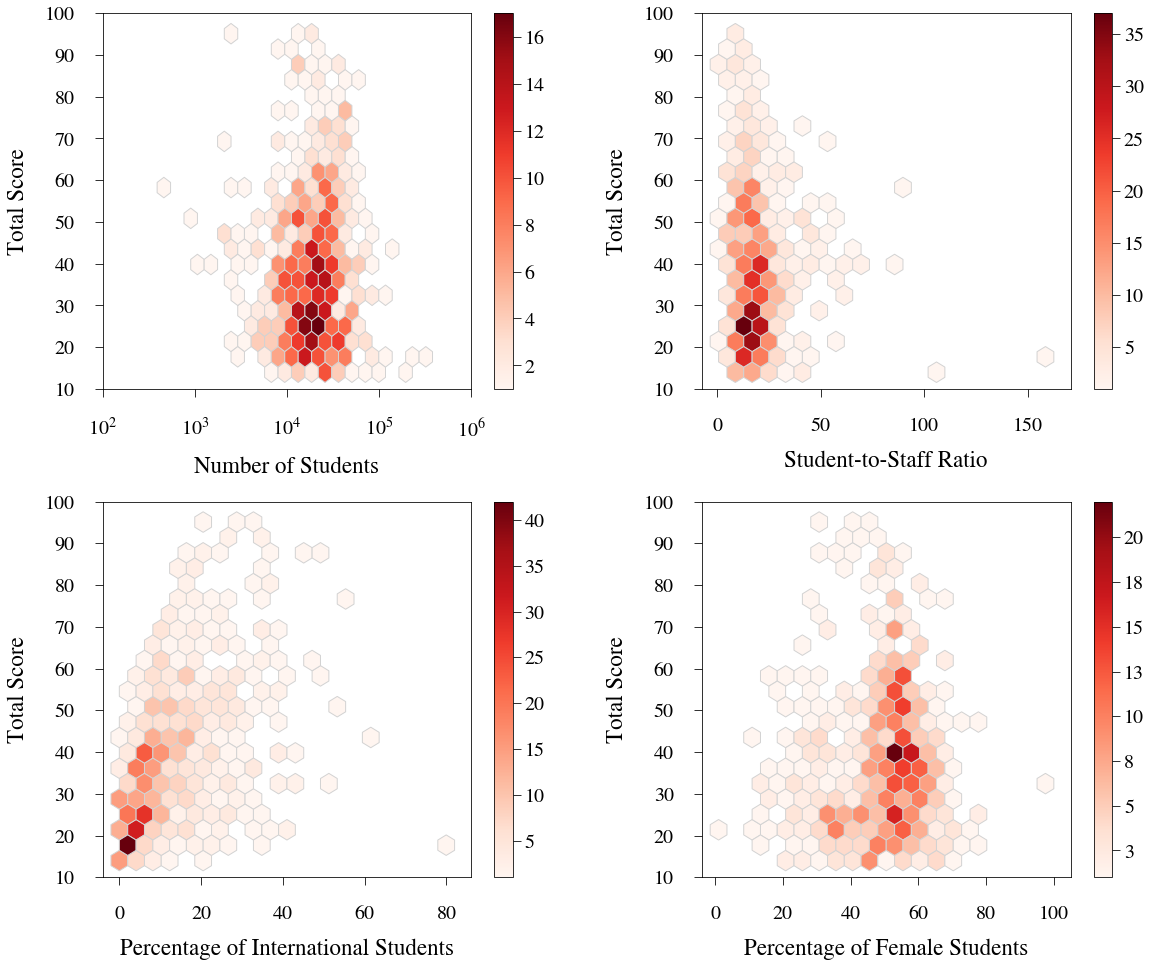

In [12]:
# This plot follows the same process seen in Part 1:

#NOTE: the mathtext does not appear on the plot until you run the code twice, not
#sure why this happens

# Creating grid of subplots 2x2:
fig, ax = plt.subplots(2, 2, figsize = (19,15))
plt.subplots_adjust(top = 0.9,
                    bottom = 0.1,
                    wspace = 0.3, 
                    hspace = 0.3)
axes = ax.flatten() #1-D array to turn axes to matplotlib object

# Variable values and labels:
x_var = ['num_students', #count of total number of students
         'student_staff_ratio',
         'international_students', #percent of international students
         'female'] #percent of female students

y_var = 'total_score'

x_labels = ['Number of Students',
            'Student-to-Staff Ratio',
            'Percentage of International Students',
            'Percentage of Female Students']

y_label = 'Total Score'

# Constants and params:
LABEL_SIZE = 23
PAD = 16
TICK_SIZE = 20

# Font:
#regular text
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"

#math text
plt.rcParams['mathtext.fontset'] = "stix"
plt.rcParams['font.family'] = "STIXGeneral"

##################################################################
##################################################################
# Creating scatterplot for each subplot:
for i, n, v in zip(range(len(axes)), #indices for each axes plot
                   x_labels, #labels for x-axis for each axes plot
                   x_var): #column names from df
    
    #calling the hexbin plot
    ax_hex = axes[i].hexbin(college_df[v], college_df[y_var],
                            mincnt = 1, #minimum count for hexagon area
                            gridsize = 20, #size of hexagons in relation to space of plot
                            cmap = 'Reds', alpha = 1, ec = 'lightgrey')
    
    #labels and tick marks
    axes[i].set_ylabel(y_label, fontsize = LABEL_SIZE, labelpad = PAD)
    axes[i].set_xlabel(n, fontsize = LABEL_SIZE, labelpad = PAD)
    axes[i].tick_params(labelsize = TICK_SIZE, pad = 20, length = 8)
    axes[i].set_ylim(10, 100) #y scale
    
    #re-formatting first plot x axis
    if i == 0:
        axes[i].set_xlim(2, 6)
        xticks = ticker.MaxNLocator(4)
        axes[i].xaxis.set_major_locator(xticks)
        axes[i].set_xticklabels(labels = [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', 
                                          r'$10^{5}$', r'$10^{6}$'])

    #colorbar
    cb = plt.colorbar(ax_hex, ax = axes[i])
    
    if i == 3: #formatting tick labels
        cb.ax.set_yticklabels([''] + ['3', '5', '8', '10', '13', '15', '18', '20'])
        cb.ax.tick_params(labelsize = TICK_SIZE, length = 8)
        
    else:
        cb.ax.tick_params(labelsize = TICK_SIZE, length = 8)

plt.savefig('hex.png', bbox_inches = 'tight', facecolor = 'white')
plt.show()